<a href="https://colab.research.google.com/github/dsklnr/Predicting_Salaries_of_Technical_Individuals/blob/main/Ben_Predicting_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
survey = pd.read_csv("/content/survey_results_public.csv")
survey_df = pd.DataFrame(survey)
survey_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

In [4]:
survey_df.shape

(73268, 79)

In [5]:
survey_df.dtypes

ResponseId                          int64
MainBranch                         object
Employment                         object
RemoteWork                         object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
LearnCodeCoursesCert               object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
Country                            object
Currency                           object
CompTotal                         float64
CompFreq                           object
LanguageHaveWorkedWith             object
LanguageWantToWorkWith             object
DatabaseHaveWorkedWith             object
DatabaseWantToWorkWith             object
PlatformHaveWorkedWith            

In [6]:
# Get the total number of non null values for each column
non_nulls = survey_df.count()

# Sort the number of nun null values for each column from greatest to least
non_nulls.sort_values(ascending=False)

ResponseId                        73268
MainBranch                        73268
Country                           71771
Employment                        71709
LearnCode                         71580
SOAccount                         71572
EdLevel                           71571
SOComm                            71408
VersionControlSystem              71379
NEWSOSites                        71365
YearsCode                         71331
Blockchain                        71071
LanguageHaveWorkedWith            70975
OpSysPersonal use                 70963
SOVisitFreq                       70961
Age                               70946
Gender                            70853
SurveyEase                        70508
SurveyLength                      70444
NEWCollabToolsHaveWorkedWith      70347
Trans                             70315
Ethnicity                         69474
VCInteraction                     68156
BuyNewTool                        67963
Accessibility                     67244


In [7]:
# Get the total number of null values for each column
total_nulls = survey_df.isnull().sum()

# Sort the number of null values for each column from least to most
total_nulls.sort_values(ascending=True)

ResponseId                            0
MainBranch                            0
Country                            1497
Employment                         1559
LearnCode                          1688
SOAccount                          1696
EdLevel                            1697
SOComm                             1860
VersionControlSystem               1889
NEWSOSites                         1903
YearsCode                          1937
Blockchain                         2197
LanguageHaveWorkedWith             2293
OpSysPersonal use                  2305
SOVisitFreq                        2307
Age                                2322
Gender                             2415
SurveyEase                         2760
SurveyLength                       2824
NEWCollabToolsHaveWorkedWith       2921
Trans                              2953
Ethnicity                          3794
VCInteraction                      5112
BuyNewTool                         5305
Accessibility                      6024


In [8]:
# Get the total number of survey responses
total = survey_df['ResponseId'].count()

# Get the total percentage of nulls for each column
percent_col_null = total_nulls / total * 100

# Sort the perctange of null values for each column from least to most
percent_col_null.sort_values(ascending=True)

ResponseId                          0.000000
MainBranch                          0.000000
Country                             2.043184
Employment                          2.127805
LearnCode                           2.303871
SOAccount                           2.314790
EdLevel                             2.316154
SOComm                              2.538625
VersionControlSystem                2.578206
NEWSOSites                          2.597314
YearsCode                           2.643719
Blockchain                          2.998581
LanguageHaveWorkedWith              3.129606
OpSysPersonal use                   3.145985
SOVisitFreq                         3.148714
Age                                 3.169187
Gender                              3.296118
SurveyEase                          3.766992
SurveyLength                        3.854343
NEWCollabToolsHaveWorkedWith        3.986734
Trans                               4.030409
Ethnicity                           5.178250
VCInteract

In [9]:
# Get all education level values and the count for each level
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

In [10]:
# Remove all rows with null values for total compensation
comp_total_df = survey_df[survey_df['CompTotal'].notna()]

# Get the new total number of null values
revised_df = comp_total_df.isnull().sum()

# Sort the number of null values for each column from least to most
revised_df.sort_values(ascending=True)

ResponseId                            0
MainBranch                            0
CompTotal                             0
Currency                              0
Country                               0
Employment                            4
EdLevel                              18
LearnCode                            21
OrgSize                              31
SOAccount                            33
VersionControlSystem                 42
PurchaseInfluence                    47
RemoteWork                           72
YearsCode                            73
CompFreq                             75
SOComm                               80
Age                                  88
CodingActivities                     91
NEWSOSites                           93
DevType                             100
LanguageHaveWorkedWith              116
Blockchain                          117
Gender                              135
SOVisitFreq                         137
YearsCodePro                        144


In [11]:
# Create a new data frame from the comp_total_df that only has respondents from the United States
us_df = comp_total_df[comp_total_df['Country'] == 'United States of America']

In [12]:
# Create a subset data frame with relevant attributes for the study
study_df = us_df[['CompTotal', 'EdLevel', 'Employment', 'LanguageHaveWorkedWith',
                       'Gender', 'Country', 'YearsCode', 'YearsCodePro', 'RemoteWork',
                       'LearnCode', 'OrgSize', 'Currency', 'Ethnicity']]
study_df

,CompTotal,EdLevel,Employment,LanguageHaveWorkedWith,Gender,Country,YearsCode,YearsCodePro,RemoteWork,LearnCode,OrgSize,Currency,Ethnicity
11,194400.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Man,United States of America,12,10,Fully remote,"Other online resources (e.g., videos, blogs, f...",20 to 99 employees,USD\tUnited States dollar,White
12,65000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",C;HTML/CSS;Rust;SQL;Swift;TypeScript,Man,United States of America,12,5,"Hybrid (some remote, some in-person)","School (i.e., University, College, etc)",2 to 9 employees,USD\tUnited States dollar,White
14,110000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time;Independent contractor, fr...",HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Man,United States of America,11,5,Fully remote,"Other online resources (e.g., videos, blogs, f...","5,000 to 9,999 employees",USD\tUnited States dollar,White
26,106960.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;SQL,Man,United States of America,10,5,"Hybrid (some remote, some in-person)",Books / Physical media;Other online resources ...,20 to 99 employees,USD\tUnited States dollar,White;North American
28,130000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",C;C++,Man,United States of America,20,14,"Hybrid (some remote, some in-person)","Books / Physical media;School (i.e., Universit...","10,000 or more employees",USD\tUnited States dollar,Prefer not to say
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73223,200000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Bash/Shell;C;C#;C++;Go;Java;JavaScript;Python;...,Man,United States of America,19,12,"Hybrid (some remote, some in-person)",Books / Physical media;Friend or family member...,100 to 499 employees,USD\tUnited States dollar,White;North American
73226,130000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",Bash/Shell;Go;HTML/CSS;JavaScript;Python;Ruby;SQL,Man,United States of America,20,16,Fully remote,Books / Physical media;Other online resources ...,"1,000 to 4,999 employees",USD\tUnited States dollar,White
73229,325000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Bash/Shell;C++;PowerShell;Python;SQL,Man,United States of America,18,15,Full in-person,Books / Physical media;Other online resources ...,500 to 999 employees,USD\tUnited States dollar,Prefer not to say
73254,115000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",R,Man,United States of America,7,6,"Hybrid (some remote, some in-person)",Books / Physical media;Friend or family member...,"10,000 or more employees",USD\tUnited States dollar,White


In [13]:
# Get the total number of null values for each column in the study's data frame
null_total = study_df.isnull().sum()

# Get the total number of values for each column
study_total = study_df.count()

# Get the percentage of nulls for each column
percent_null = null_total / study_total * 100

# Sort the perctange of null values for each column from least to most
#percent_null.sort_values(ascending=True)
null_total

CompTotal                   0
EdLevel                     0
Employment                  0
LanguageHaveWorkedWith     22
Gender                     51
Country                     0
YearsCode                  15
YearsCodePro               23
RemoteWork                 23
LearnCode                   3
OrgSize                     3
Currency                    0
Ethnicity                 124
dtype: int64

In [14]:
# Drop all null values from the data frame
dropped_nulls_df = study_df.dropna()

# Get the total count for each cleaned column
dropped_nulls_df.count()

CompTotal                 8575
EdLevel                   8575
Employment                8575
LanguageHaveWorkedWith    8575
Gender                    8575
Country                   8575
YearsCode                 8575
YearsCodePro              8575
RemoteWork                8575
LearnCode                 8575
OrgSize                   8575
Currency                  8575
Ethnicity                 8575
dtype: int64

In [15]:
# Parse the CodePro column to keep integer values
dropped_nulls_df.loc[dropped_nulls_df['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = 50
dropped_nulls_df.loc[dropped_nulls_df['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = 0

# Convert YearsCodePro from an object data type to a integer
dropped_nulls_df['YearsCodePro'] = pd.to_numeric(dropped_nulls_df['YearsCodePro'], errors='coerce')

<ipython-input-15-99221c49fa27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_nulls_df['YearsCodePro'] = pd.to_numeric(dropped_nulls_df['YearsCodePro'], errors='coerce')


In [16]:
# Get the data type for each column
dropped_nulls_df.dtypes

CompTotal                 float64
EdLevel                    object
Employment                 object
LanguageHaveWorkedWith     object
Gender                     object
Country                    object
YearsCode                  object
YearsCodePro                int64
RemoteWork                 object
LearnCode                  object
OrgSize                    object
Currency                   object
Ethnicity                  object
dtype: object

Text(0, 0.5, 'Total Compensation')

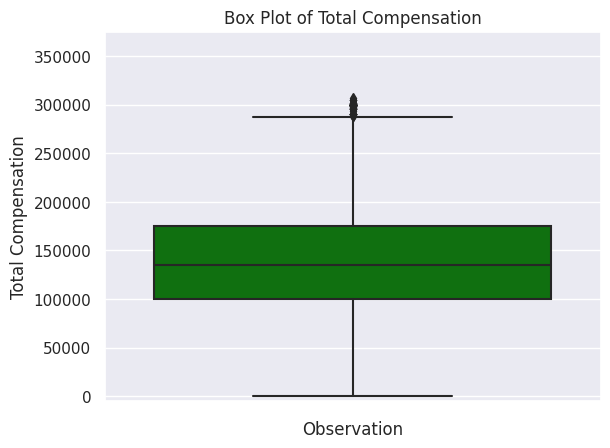

In [17]:
# Get upper and lower bounds in order to remove outliers
quartile1 = dropped_nulls_df['CompTotal'].quantile(0.25)
quartile3 = dropped_nulls_df['CompTotal'].quantile(0.75)
iqr = quartile3 - quartile1
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr
removed_outliers = dropped_nulls_df[(dropped_nulls_df['CompTotal'] >= lower_bound)
        & (dropped_nulls_df['CompTotal'] <= upper_bound)]

# Create a boxplot for total compensation with removed outliers
sns.set(style = 'darkgrid')
sns.boxplot(y = removed_outliers['CompTotal'], color = 'green')
plt.ylim(-5000, 375000)
plt.title("Box Plot of Total Compensation")
plt.xlabel("Observation")
plt.ylabel("Total Compensation")

In [18]:
removed_outliers.count()

CompTotal                 8150
EdLevel                   8150
Employment                8150
LanguageHaveWorkedWith    8150
Gender                    8150
Country                   8150
YearsCode                 8150
YearsCodePro              8150
RemoteWork                8150
LearnCode                 8150
OrgSize                   8150
Currency                  8150
Ethnicity                 8150
dtype: int64

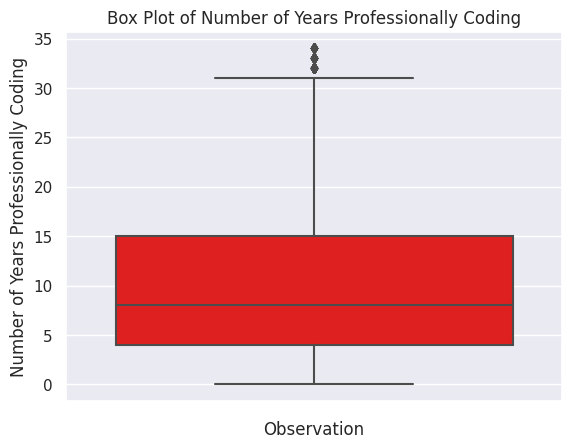

In [19]:
# Get upper and lower bounds in order to remove outliers
quartile1 = removed_outliers['YearsCodePro'].quantile(0.25)
quartile3 = removed_outliers['YearsCodePro'].quantile(0.75)
iqr = quartile3 - quartile1
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr
removed_outliers = removed_outliers[(removed_outliers['YearsCodePro'] >= lower_bound)
        & (removed_outliers['YearsCodePro'] <= upper_bound)]

# Create histogram for years of professionally programming
sns.boxplot(y = removed_outliers['YearsCodePro'], color = 'red')
plt.xticks(rotation = 90)
plt.title("Box Plot of Number of Years Professionally Coding")
plt.xlabel("Observation")
plt.ylabel("Number of Years Professionally Coding")
plt.show()

In [20]:
removed_outliers.count()

CompTotal                 7839
EdLevel                   7839
Employment                7839
LanguageHaveWorkedWith    7839
Gender                    7839
Country                   7839
YearsCode                 7839
YearsCodePro              7839
RemoteWork                7839
LearnCode                 7839
OrgSize                   7839
Currency                  7839
Ethnicity                 7839
dtype: int64

In [21]:
# Perform descriptive statistics on all numeric columns in the DataFrame
removed_outliers.describe()

,CompTotal,YearsCodePro
count,7839.000000,7839.000000
mean,138760.880725,10.544585
std,60303.096045,8.107596
min,0.000000,0.000000
25%,100000.000000,4.000000
50%,135000.000000,8.000000
75%,175000.000000,15.000000
max,306444.000000,34.000000


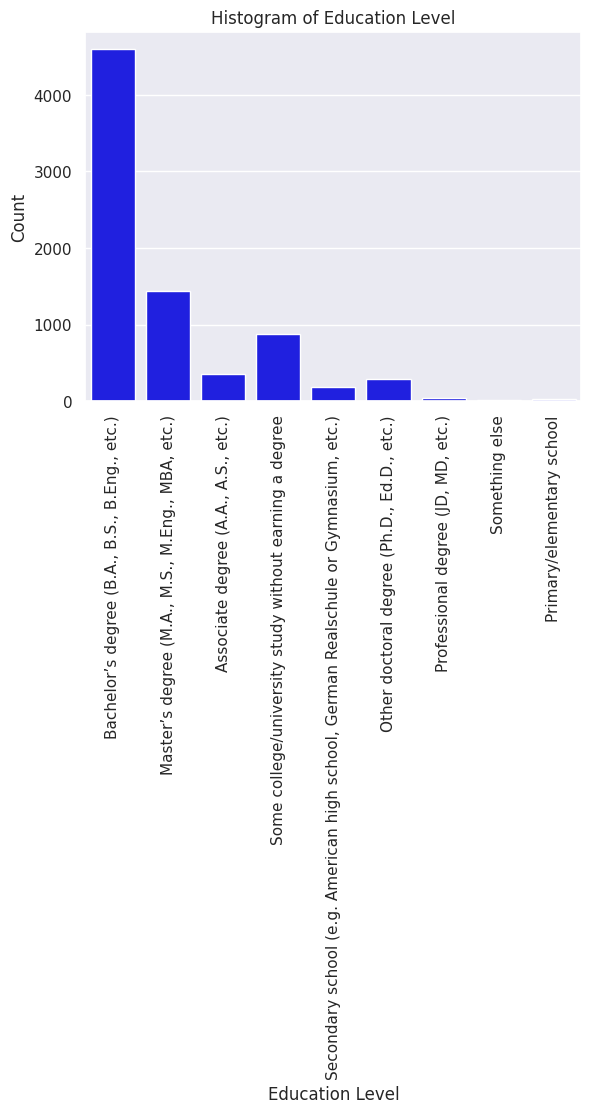

In [22]:
# Create histogram for Education Level
educ_order = ["Primary/elementary school",
              "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
              "Some college/university study without earning a degree",
              "Associate degree (A.A., A.S., etc.)",
              "Bachelor's degree (B.A., B.S., B.Eng., etc.)",
              "Master's degree (M.A., M.S., M.Eng., MBA, etc.)",
              "Professional degree (JD, MD, etc.)",
              "Other doctoral degree (Ph.D., Ed.D., etc.)",
              "Something else"]

orders = removed_outliers['EdLevel'].value_counts().index

sns.countplot(data = removed_outliers, x = "EdLevel", color = 'blue')
plt.xticks(rotation = 90)
plt.title("Histogram of Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

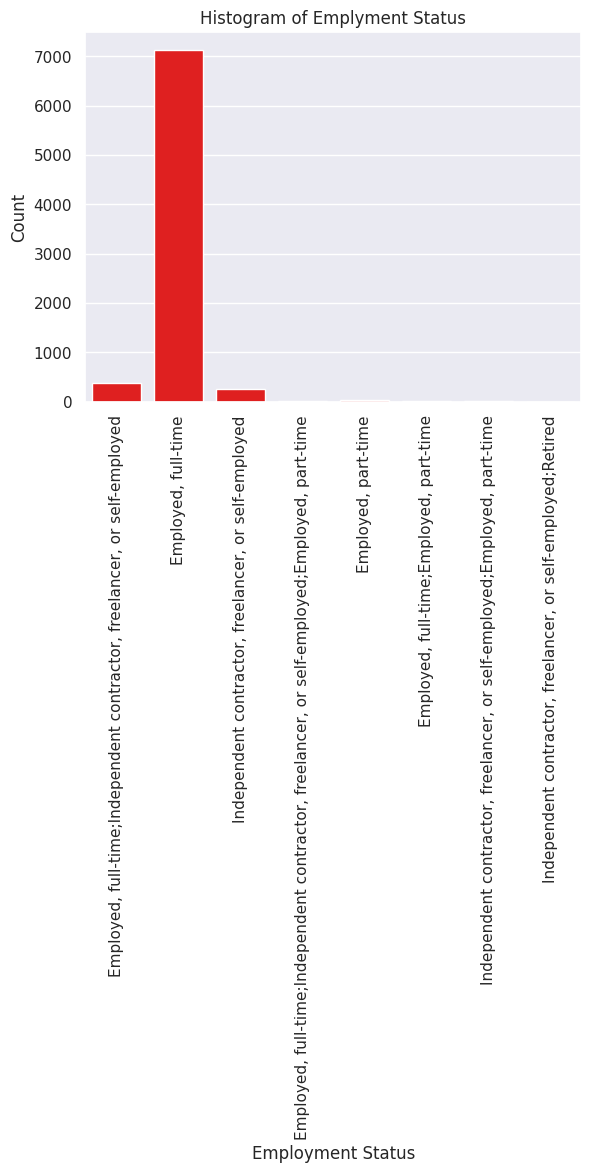

In [23]:
# Create histogram for employment type
sns.countplot(data = removed_outliers, x = "Employment", color = 'red')
plt.xticks(rotation = 90)
plt.title("Histogram of Emplyment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

In [24]:
# Create histogram for programming languages used
# sns.countplot(data = removed_outliers, x = "LanguageHaveWorkedWith", color = 'pink')
# plt.xticks(rotation = 90)
# plt.title("Histogram of Programming Languages")
# plt.xlabel("Programming Language")
# plt.ylabel("Count")
# plt.show()

# Cannot display this plot due to parsing issues within LanguageHaveWorkedWith observations
# Will need to parse out each individual language to get an accurate representation, but
# this would be a challenging column to deal with because the number of LanguageHaveWorkedWith
# observations needs match the same number of observations of all other columns

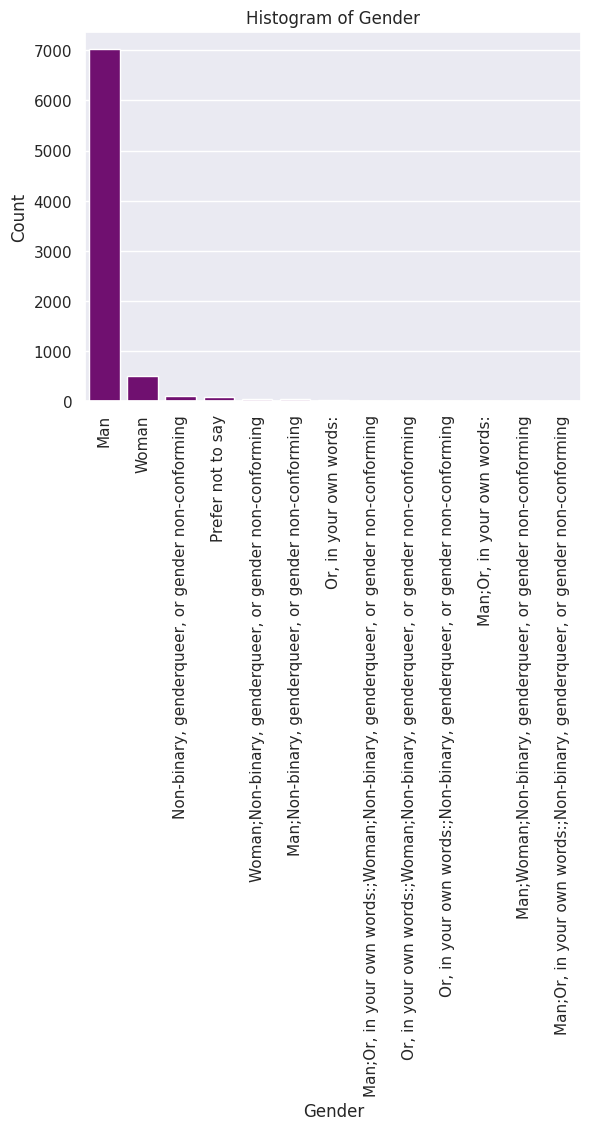

In [25]:
# Create histogram for gender
sns.countplot(data = removed_outliers, x = "Gender", color = 'purple')
plt.xticks(rotation = 90)
plt.title("Histogram of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

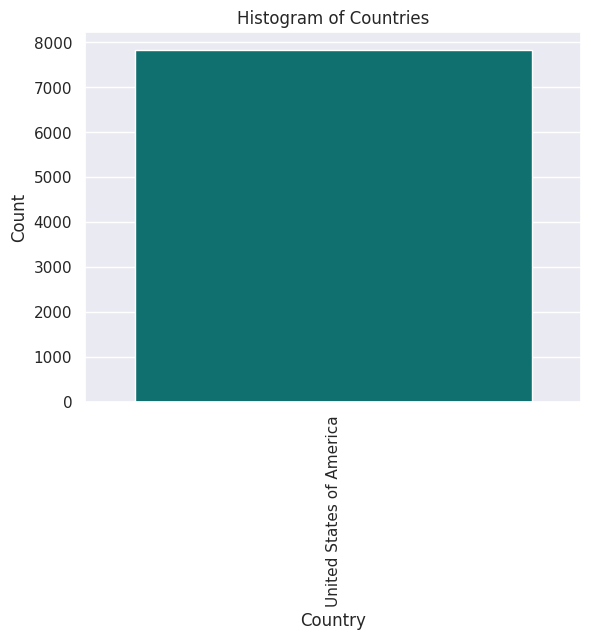

In [26]:
# Create histogram for country
sns.countplot(data = removed_outliers, x = "Country", color = 'teal')
plt.xticks(rotation = 90)
plt.title("Histogram of Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

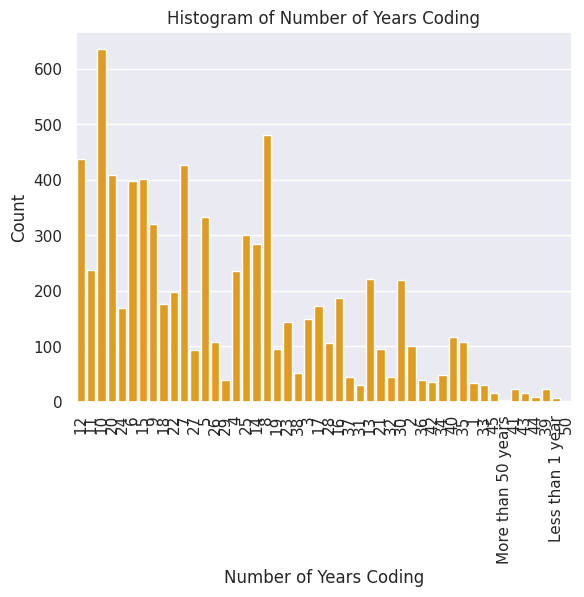

In [27]:
# Create histogram for years of programming
sns.countplot(data = removed_outliers, x = "YearsCode", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Number of Years Coding")
plt.xlabel("Number of Years Coding")
plt.ylabel("Count")
plt.show()

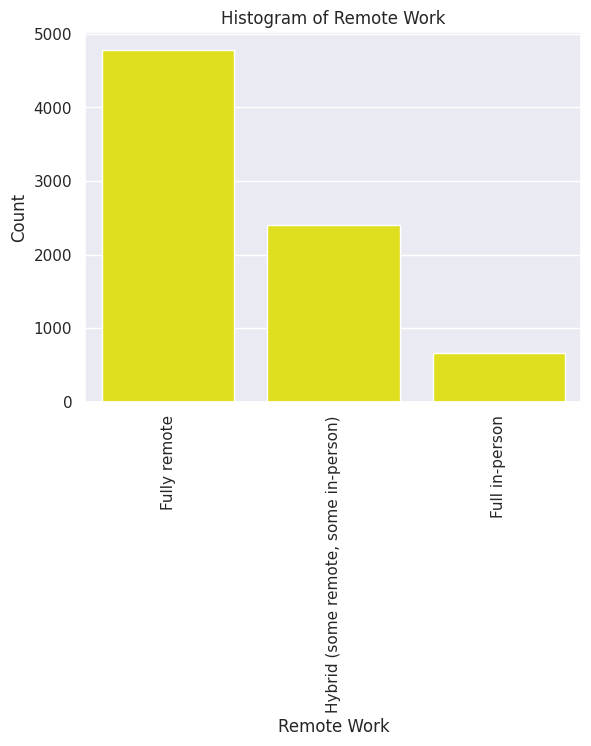

In [28]:
# Create histogram for remote work type
sns.countplot(data = removed_outliers, x = "RemoteWork", color = 'yellow')
plt.xticks(rotation = 90)
plt.title("Histogram of Remote Work")
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.show()

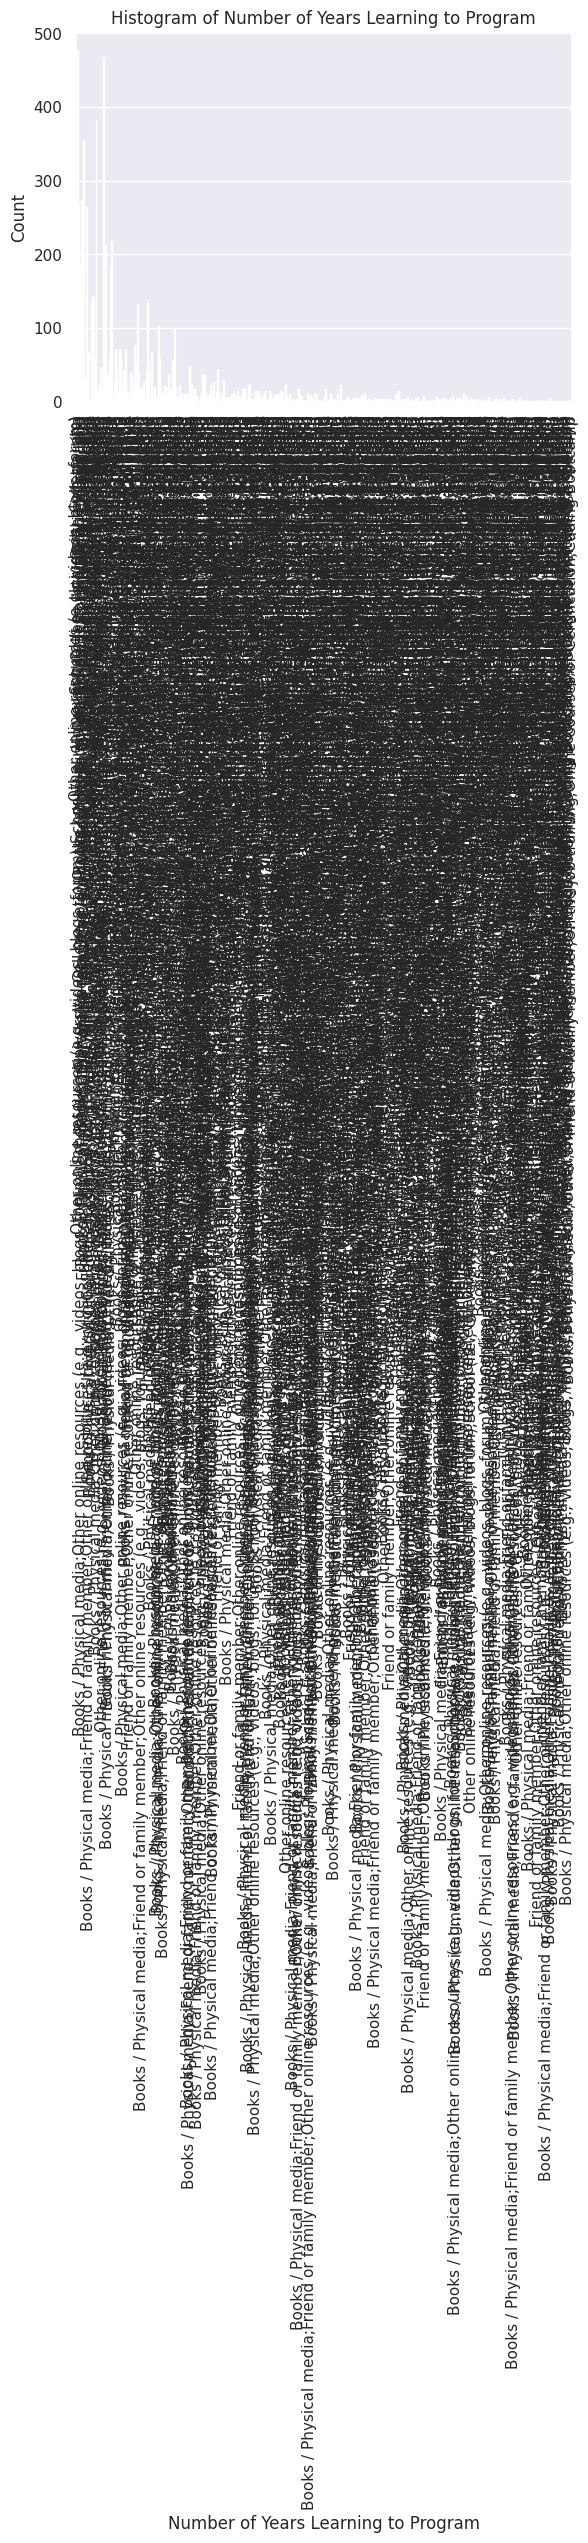

In [29]:
# Create histogram for how each person learned to program
sns.countplot(data = removed_outliers, x = "LearnCode", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Number of Years Learning to Program")
plt.xlabel("Number of Years Learning to Program")
plt.ylabel("Count")
plt.show()

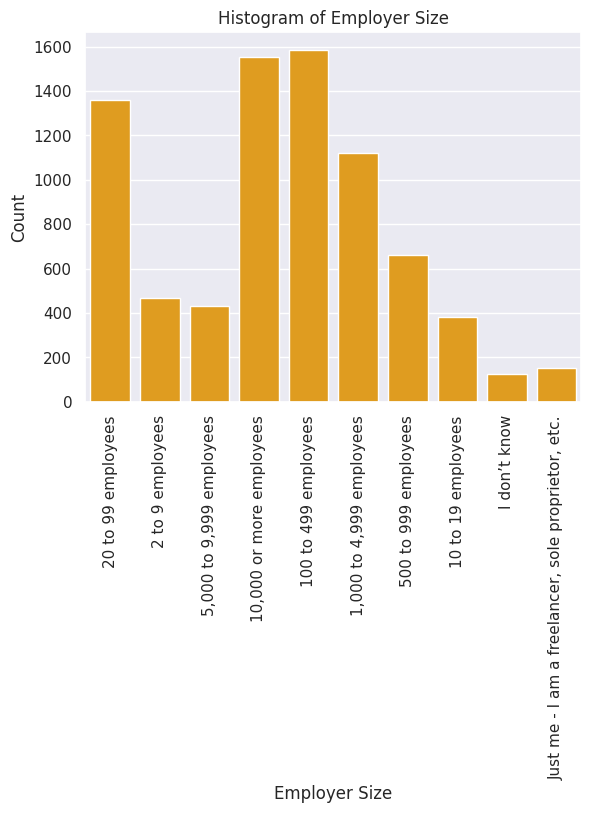

In [30]:
# Create histogram for employer size
sns.countplot(data = removed_outliers, x = "OrgSize", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Employer Size")
plt.xlabel("Employer Size")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


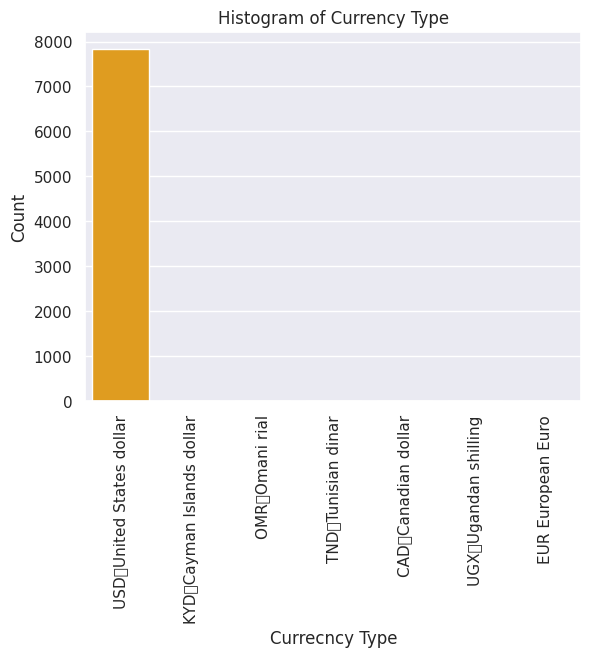

In [31]:
# Create histogram for currency type
sns.countplot(data = removed_outliers, x = "Currency", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Currency Type")
plt.xlabel("Currecncy Type")
plt.ylabel("Count")
plt.show()

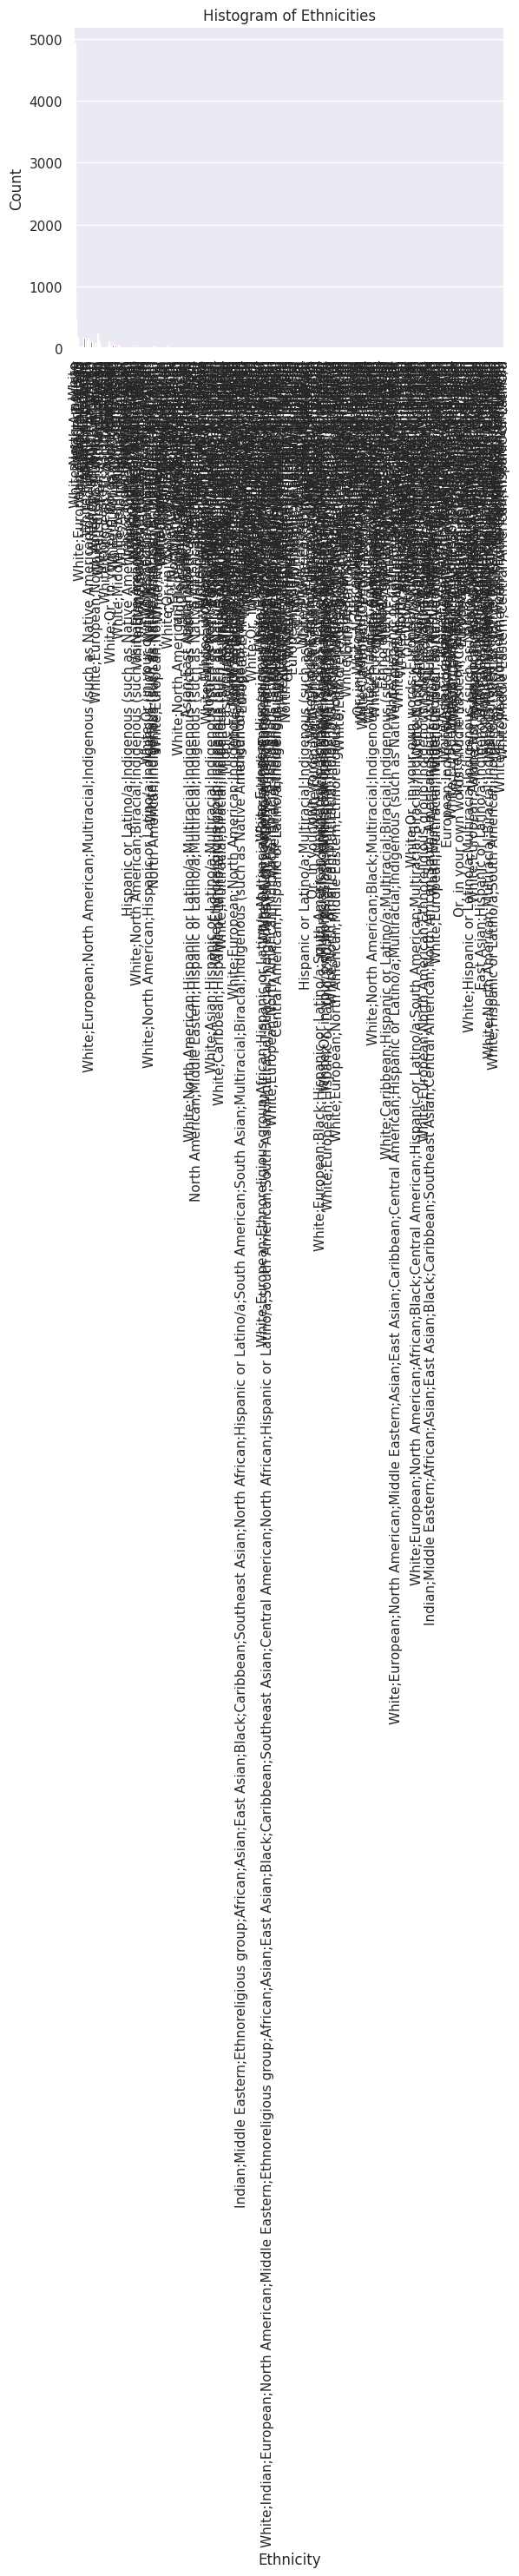

In [32]:
# Create histogram for ethnicity
sns.countplot(data = removed_outliers, x = "Ethnicity", color = 'red')
plt.xticks(rotation = 90)
plt.title("Histogram of Ethnicities")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()

In [33]:
# Select columns for modeling
clean_study = removed_outliers[['CompTotal', 'YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
clean_study

,CompTotal,YearsCodePro,EdLevel,RemoteWork,OrgSize
11,194400.0,10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fully remote,20 to 99 employees
12,65000.0,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)",2 to 9 employees
14,110000.0,5,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Fully remote,"5,000 to 9,999 employees"
26,106960.0,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)",20 to 99 employees
28,130000.0,14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","10,000 or more employees"
...,...,...,...,...,...
73222,300000.0,11,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fully remote,"5,000 to 9,999 employees"
73223,200000.0,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)",100 to 499 employees
73226,130000.0,16,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fully remote,"1,000 to 4,999 employees"
73254,115000.0,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","10,000 or more employees"


In [34]:
# Get the total number of rows
clean_study.count()

CompTotal       7839
YearsCodePro    7839
EdLevel         7839
RemoteWork      7839
OrgSize         7839
dtype: int64

In [35]:
# Divide the clean data frame into test and train data frames
test_size = int(len(clean_study) * 0.33)
train_size = len(clean_study) - test_size

# Randomly select rows for the test and train data frames
test_df = clean_study.sample(n = test_size, random_state=42)
train_df = clean_study.drop(test_df.index)

In [36]:
# Get the count of the test data frame
test_df.count()

CompTotal       2586
YearsCodePro    2586
EdLevel         2586
RemoteWork      2586
OrgSize         2586
dtype: int64

In [37]:
# Get the count of the train data frame
train_df.count()

CompTotal       5253
YearsCodePro    5253
EdLevel         5253
RemoteWork      5253
OrgSize         5253
dtype: int64